# **Cricket Analysics refer to the use of data analytics, statistical techniques, and machine learning to extract insights from cricket data. These Insights are used to**
* Player Performance
* Team strategies
* Match Outcomes
* Analyse Trends

## Why Cricket Analytics matters
* Players Insights
* Team Strategy
* Predictive Power

## Real-Life examples of cricket analytics
- Ipl auctions
- Match simulations
- Player workload management
## How Data Science is applied in cricket
- Descriptive analytics -> we use historical data to analyse trends and patterns
- Predictive analytics -> we use historical data to predict future events and outcomes
- Prescriptive analytics -> we use historical data to make decisions

### The Role of data in cricket
- Player data
- Match data
- Team data
- Event data

# **Required Libraries**


In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

# **Exploring_Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
match = pd.read_csv('/content/drive/MyDrive/matches.csv')
delivery = pd.read_csv('/content/drive/MyDrive/deliveries.csv')

In [5]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [6]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [7]:
print('Matches dataset shape',match.shape)
print('Deliveries dataset shape',delivery.shape)

Matches dataset shape (1095, 20)
Deliveries dataset shape (260920, 17)


In [8]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [9]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [10]:
# generate descriptive statistics
match.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [11]:
delivery.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [12]:
match.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


In [13]:
delivery.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


## Display unique values in a batting_team

In [14]:
delivery['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [15]:
match['team1'].nunique()
# number of unique teams in matches dataset

19

In [16]:
# number of unique players in delivery dataset
delivery['batter'].nunique()

673

In [17]:
match.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [18]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [19]:
match.dtypes #data types associated with the each column

,0
id,int64
season,object
city,object
date,object
match_type,object
player_of_match,object
venue,object
team1,object
team2,object
toss_winner,object


In [20]:
delivery.dtypes

,0
match_id,int64
inning,int64
batting_team,object
bowling_team,object
over,int64
ball,int64
batter,object
bowler,object
non_striker,object
batsman_runs,int64


In [21]:
match.sample(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
488,829769,2015,Mumbai,2015-05-01,League,AT Rayudu,Wankhede Stadium,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,Mumbai Indians,runs,8.0,188.0,20.0,N,NaN,HDPK Dharmasena,CK Nandan
126,419117,2009/10,Cuttack,2010-03-19,League,A Symonds,Barabati Stadium,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,Deccan Chargers,runs,6.0,171.0,20.0,N,NaN,BF Bowden,M Erasmus
250,548308,2012,Mumbai,2012-04-06,League,SPD Smith,Wankhede Stadium,Mumbai Indians,Pune Warriors,Mumbai Indians,field,Pune Warriors,runs,28.0,130.0,20.0,N,NaN,AK Chaudhary,SJA Taufel
774,1216519,2020/21,NaN,2020-10-05,League,AR Patel,Dubai International Cricket Stadium,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Delhi Capitals,runs,59.0,197.0,20.0,N,NaN,Nitin Menon,YC Barde
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,141.0,20.0,N,NaN,HDPK Dharmasena,RK Illingworth


In [22]:
delivery.sample()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
94210,598072,2,Mumbai Indians,Rajasthan Royals,5,3,DR Smith,JP Faulkner,AP Tare,1,0,1,NaN,0,NaN,NaN,NaN


# **Time Series Analysis in Cricket**
* Extract Player performance - strike rate and economy rate
* Analyze Team Performance by seasons
* Player Performance Trends
* Team Performance comparison
* Powerplay Analysis
* Death Overs Analysis

## Step 1: Aggregate Batsman Performance

In [23]:
# aggregate player batting performance

#step1: Aggregate Batsman Performance
batting_performance = delivery.groupby(['batter'])['batsman_runs'].sum().reset_index()
batting_performance.rename(columns={'batsman_runs':'total_runs'},inplace=True)

# step 2 : Aggregate Bowlers performance
bowler_performance = delivery.groupby(['bowler'])['total_runs'].sum().reset_index()
bowler_performance.rename(columns={'total_runs':'runs_conceded'},inplace=True)

#display the top5 batsman and bowlers
print('Top 5 Batsman')
print(batting_performance.sort_values(by='total_runs',ascending=False).head())
print('Top 5 Bowlers')
print(bowler_performance.sort_values(by='runs_conceded',ascending=True).head())

Top 5 Batsman
        batter  total_runs
631    V Kohli        8014
512   S Dhawan        6769
477  RG Sharma        6630
147  DA Warner        6567
546   SK Raina        5536
Top 5 Bowlers
            bowler  runs_conceded
24    AC Gilchrist              0
114      DA Warner              2
64   Atharva Taide              4
447      SPD Smith              5
38       AM Rahane              5


# **Analyzing Team Performances Across Seasons**

In [24]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [25]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


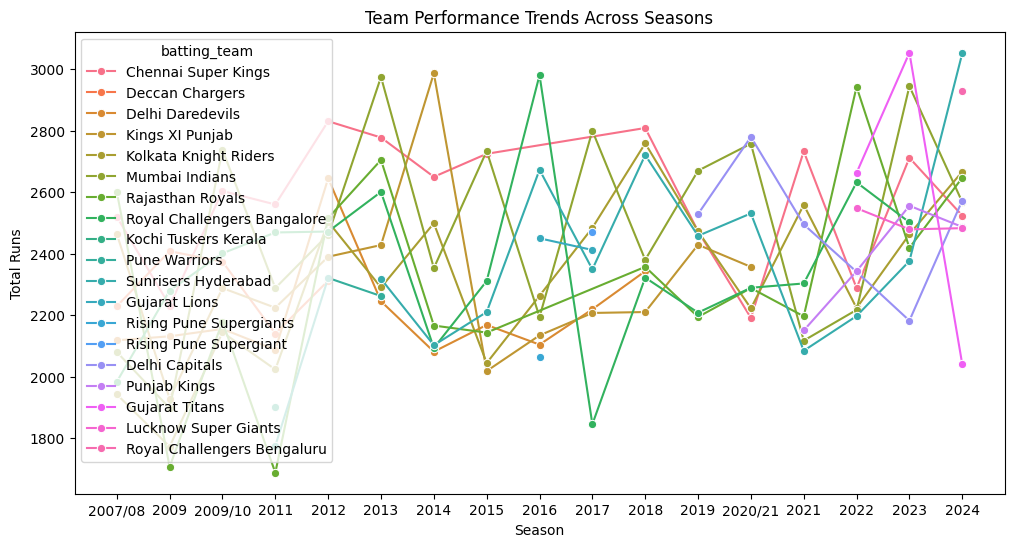

In [26]:
# step 1: Merge Deliveries and Matches Data
deliveries_with_season = pd.merge(delivery, match[['id','season']], left_on='match_id', right_on='id')
# step2: Aggregate team performance by season
team_season_performance = deliveries_with_season.groupby(['season','batting_team'])['total_runs'].sum().reset_index()

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.lineplot(data=team_season_performance,x='season',y='total_runs',hue='batting_team', marker = 'o')
plt.title('Team Performance Trends Across Seasons')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.show()

# **Analyzing Player Performance Across Seasons**

**Step 1: Aggregate Player Performance by season**

In [27]:
player_season_performance = deliveries_with_season.groupby(['season','batter']).agg({
    'batsman_runs':'sum',
    'ball':'count'
}).reset_index()

**step 2: calculate the strike rate =(total_runs/total_balls)*100**

In [28]:
player_season_performance['strike_rate'] = (
    player_season_performance['batsman_runs']/player_season_performance['ball']
)*100

**step 3 : To Filter the top player for visualization**

In [29]:
top_players = player_season_performance.groupby('batter')['batsman_runs'].sum().nlargest(5).index
filtered_data = player_season_performance[player_season_performance['batter'].isin(top_players)]

**step 4: Visualistaion player performance**

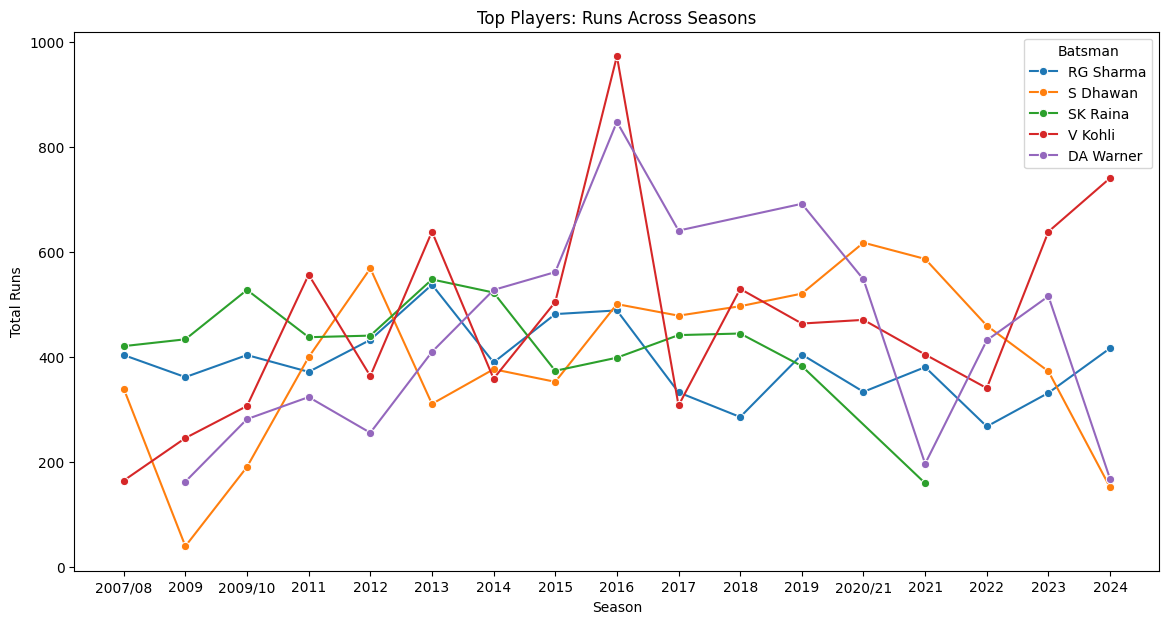

In [30]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_data, x='season', y='batsman_runs', hue='batter', marker='o')
plt.title('Top Players: Runs Across Seasons')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.legend(title ='Batsman')
plt.show()

## **Plot for Strike Rates of Top Players**

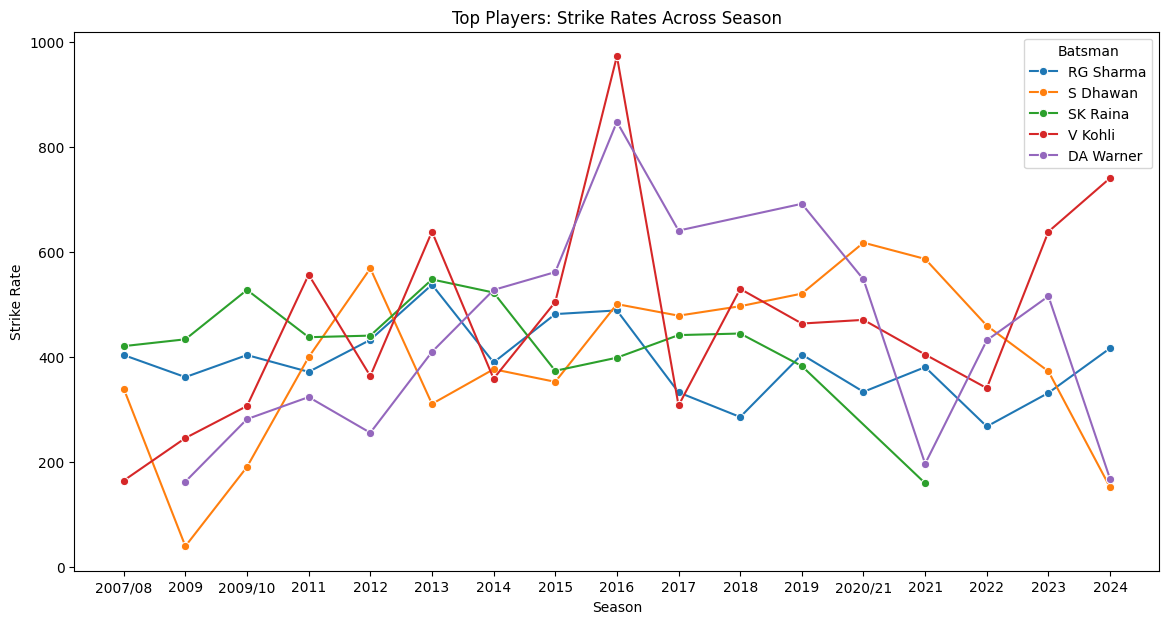

In [31]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_data, x='season', y='batsman_runs', hue='batter', marker='o')
plt.title('Top Players: Strike Rates Across Season')
plt.xlabel('Season')
plt.ylabel('Strike Rate')
plt.legend(title ='Batsman')
plt.show()

# **Team Performance Comparison**

step 1: Aggregating Total runs scored by teams across seasons

In [32]:
deliveries_with_season

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,id,season
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,335982,2007/08
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,335982,2007/08
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,1426312,2024
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,1426312,2024
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,1426312,2024
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,1426312,2024


## aggregate team performance by season


In [33]:
team_performance = deliveries_with_season.groupby(['season','batting_team']).agg({
    'total_runs':'sum'
}).reset_index()

In [34]:
team_performance

,season,batting_team,total_runs
0,2007/08,Chennai Super Kings,2520
1,2007/08,Deccan Chargers,2229
2,2007/08,Delhi Daredevils,2118
3,2007/08,Kings XI Punjab,2464
4,2007/08,Kolkata Knight Riders,1942
...,...,...,...
141,2024,Mumbai Indians,2568
142,2024,Punjab Kings,2487
143,2024,Rajasthan Royals,2647
144,2024,Royal Challengers Bengaluru,2930


### Step 2: Aggregate Total Wickets taken by teams Across Seasons

In [35]:
wickets = deliveries_with_season[deliveries_with_season['dismissal_kind'].notnull()]
team_wickets = wickets.groupby(['season','bowling_team']).size().reset_index(name='total_wickets')

In [36]:
wickets

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,id,season
33,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,5,2,SC Ganguly,Z Khan,BB McCullum,0,0,0,NaN,1,SC Ganguly,caught,JH Kallis,335982,2007/08
74,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,12,1,RT Ponting,JH Kallis,BB McCullum,0,0,0,NaN,1,RT Ponting,caught,P Kumar,335982,2007/08
106,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,17,1,DJ Hussey,AA Noffke,BB McCullum,0,0,0,NaN,1,DJ Hussey,caught,CL White,335982,2007/08
131,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,I Sharma,W Jaffer,0,0,0,NaN,1,R Dravid,bowled,NaN,335982,2007/08
138,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,2,V Kohli,AB Dinda,W Jaffer,0,0,0,NaN,1,V Kohli,bowled,NaN,335982,2007/08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260826,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,14,1,H Klaasen,Harshit Rana,PJ Cummins,0,0,0,NaN,1,H Klaasen,bowled,NaN,1426312,2024
260848,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,SP Narine,PJ Cummins,0,0,0,NaN,1,JD Unadkat,lbw,NaN,1426312,2024
260852,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,3,PJ Cummins,AD Russell,B Kumar,0,0,0,NaN,1,PJ Cummins,caught,MA Starc,1426312,2024
260861,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,1,2,SP Narine,PJ Cummins,Rahmanullah Gurbaz,0,0,0,NaN,1,SP Narine,caught,Shahbaz Ahmed,1426312,2024


In [37]:
team_wickets # Bowling strength each teams over seasons

,season,bowling_team,total_wickets
0,2007/08,Chennai Super Kings,93
1,2007/08,Deccan Chargers,67
2,2007/08,Delhi Daredevils,96
3,2007/08,Kings XI Punjab,95
4,2007/08,Kolkata Knight Riders,70
...,...,...,...
141,2024,Mumbai Indians,85
142,2024,Punjab Kings,101
143,2024,Rajasthan Royals,96
144,2024,Royal Challengers Bengaluru,88


### Step 3: Visualizing Team Performance - TotalRuns

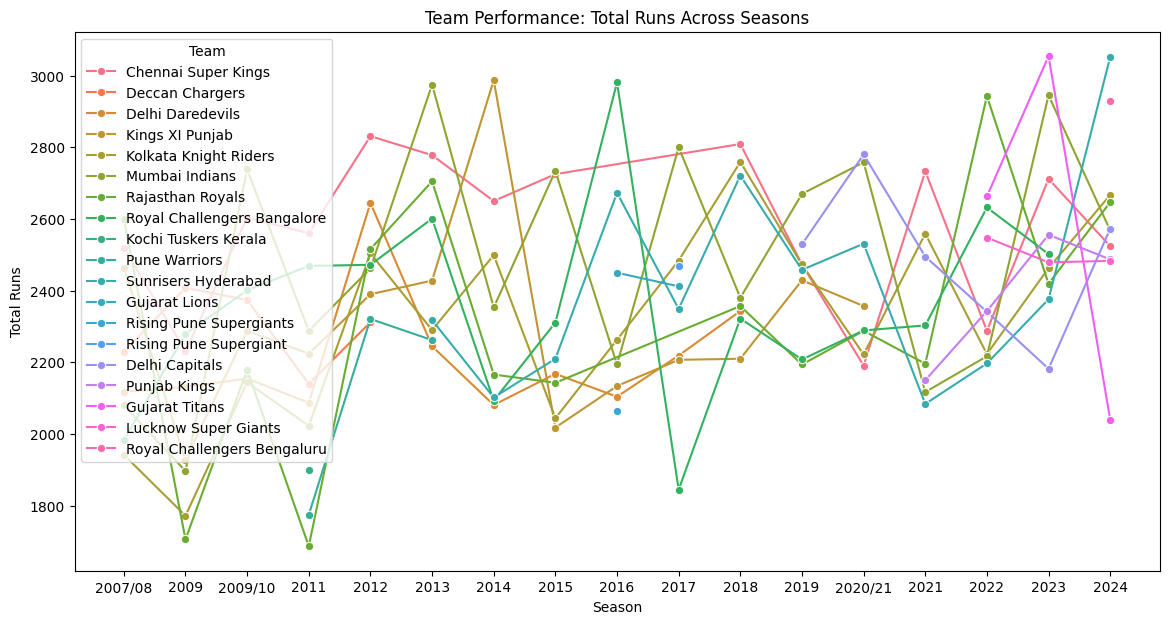

In [38]:
# plotting team total runs across seasons
plt.figure(figsize=(14,7))
sns.lineplot(data=team_performance,x='season',y='total_runs',hue='batting_team',marker='o')
plt.title('Team Performance: Total Runs Across Seasons')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.legend(title='Team')
plt.show()

# **Powerplay and Death Over Analysis**
* powerplay - first 6 overs
* deathover - last 4 overs

In [39]:
# Filter PowerPlay Deliveries

powerplay_deliveries = deliveries_with_season[deliveries_with_season['over'] <= 6]

In [40]:
powerplay_deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,id,season
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,335982,2007/08
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,335982,2007/08
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260894,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,6,2,Rahmanullah Gurbaz,Shahbaz Ahmed,VR Iyer,0,4,4,byes,0,NaN,NaN,NaN,1426312,2024
260895,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,6,3,Rahmanullah Gurbaz,Shahbaz Ahmed,VR Iyer,6,0,6,NaN,0,NaN,NaN,NaN,1426312,2024
260896,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,6,4,Rahmanullah Gurbaz,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,1426312,2024
260897,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,6,5,VR Iyer,Shahbaz Ahmed,Rahmanullah Gurbaz,0,1,1,legbyes,0,NaN,NaN,NaN,1426312,2024


In [41]:
powerplay_performance = powerplay_deliveries.groupby(['season','batting_team']).agg({
    'total_runs':'sum',
    'player_dismissed':'count'
}).reset_index()
powerplay_performance.rename(columns={'player_dismissed':'wickets_lost'},inplace=True)

In [42]:
powerplay_performance

,season,batting_team,total_runs,wickets_lost
0,2007/08,Chennai Super Kings,848,25
1,2007/08,Deccan Chargers,738,21
2,2007/08,Delhi Daredevils,841,26
3,2007/08,Kings XI Punjab,885,22
4,2007/08,Kolkata Knight Riders,604,32
...,...,...,...,...
141,2024,Mumbai Indians,910,27
142,2024,Punjab Kings,843,26
143,2024,Rajasthan Royals,867,23
144,2024,Royal Challengers Bengaluru,993,24


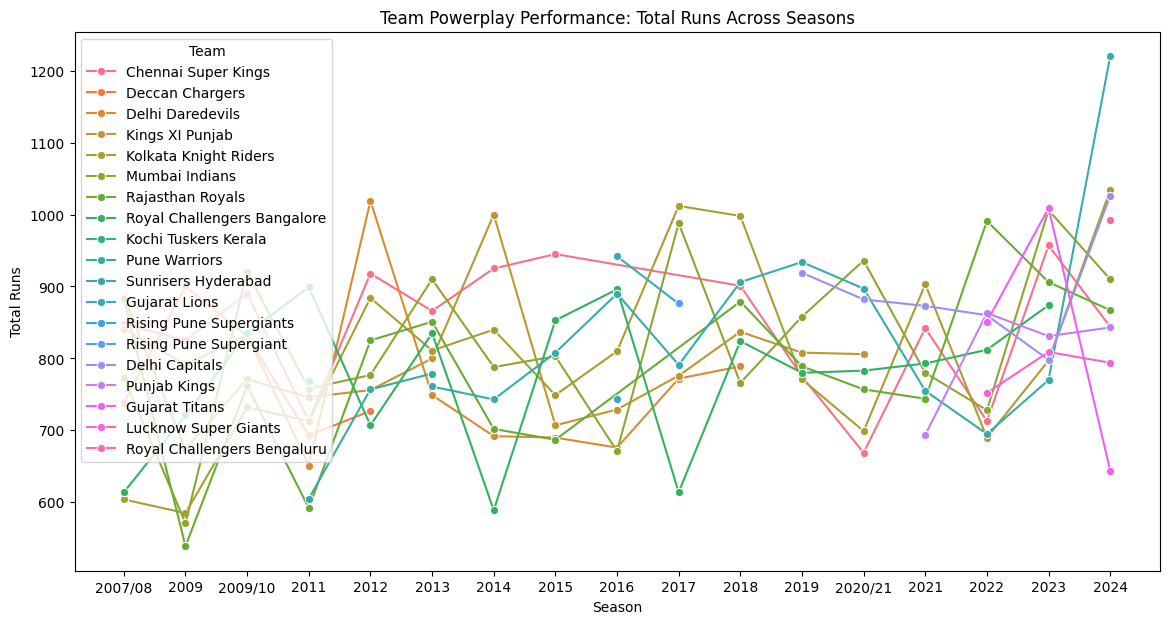

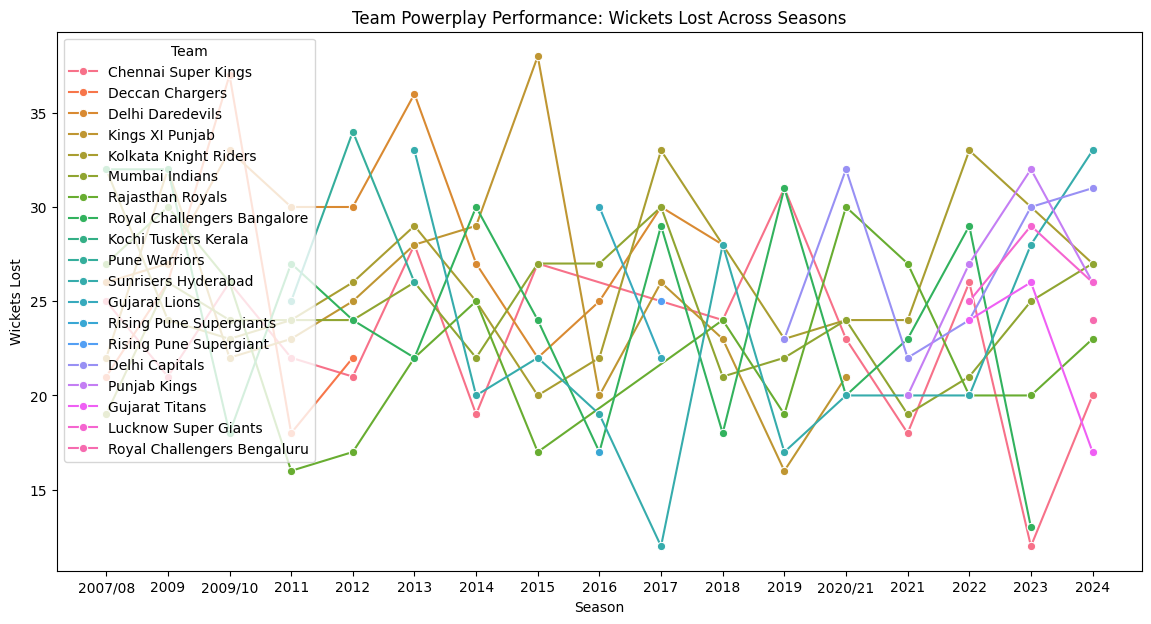

In [43]:
# plotting powerplay_performance (runs scored)
plt.figure(figsize=(14,7))
sns.lineplot(data=powerplay_performance,x='season',y='total_runs',hue='batting_team',marker='o')
plt.title('Team Powerplay Performance: Total Runs Across Seasons')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.legend(title='Team')
plt.show()

# Plotting powerplay performance (wickets_lost)
plt.figure(figsize=(14,7))
sns.lineplot(data=powerplay_performance,x='season',y='wickets_lost',hue='batting_team',marker='o')
plt.title('Team Powerplay Performance: Wickets Lost Across Seasons')
plt.xlabel('Season')
plt.ylabel('Wickets Lost')
plt.legend(title='Team')
plt.show()

### Death Over Analysis

In [44]:
# Filtering  Deliveries in DeathOver

Death_Overs_deliveries = deliveries_with_season[deliveries_with_season['over'] >= 17]

In [45]:
Death_Overs_deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,id,season
106,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,17,1,DJ Hussey,AA Noffke,BB McCullum,0,0,0,NaN,1,DJ Hussey,caught,CL White,335982,2007/08
107,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,17,2,BB McCullum,AA Noffke,Mohammad Hafeez,1,0,1,NaN,0,NaN,NaN,NaN,335982,2007/08
108,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,17,3,Mohammad Hafeez,AA Noffke,BB McCullum,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08
109,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,17,4,Mohammad Hafeez,AA Noffke,BB McCullum,1,0,1,NaN,0,NaN,NaN,NaN,335982,2007/08
110,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,17,5,BB McCullum,AA Noffke,Mohammad Hafeez,4,0,4,NaN,0,NaN,NaN,NaN,335982,2007/08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260848,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,SP Narine,PJ Cummins,0,0,0,NaN,1,JD Unadkat,lbw,NaN,1426312,2024
260849,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,SP Narine,PJ Cummins,0,0,0,NaN,0,NaN,NaN,NaN,1426312,2024
260850,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,AD Russell,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN,1426312,2024
260851,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,AD Russell,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN,1426312,2024


In [46]:
Death_Overs_Performance = deliveries_with_season.groupby(['season','batting_team']).agg({
    'total_runs':'sum',
    'player_dismissed':'count'
}).reset_index()
Death_Overs_Performance.rename(columns={'player_dismissed':'wickets_lost'},inplace=True)

In [47]:
Death_Overs_Performance

,season,batting_team,total_runs,wickets_lost
0,2007/08,Chennai Super Kings,2520,79
1,2007/08,Deccan Chargers,2229,93
2,2007/08,Delhi Daredevils,2118,77
3,2007/08,Kings XI Punjab,2464,79
4,2007/08,Kolkata Knight Riders,1942,88
...,...,...,...,...
141,2024,Mumbai Indians,2568,96
142,2024,Punjab Kings,2487,92
143,2024,Rajasthan Royals,2647,81
144,2024,Royal Challengers Bengaluru,2930,99


In [48]:
Death_Overs_bowling_performance = deliveries_with_season.groupby(['season','bowling_team']).agg({
    'player_dismissed':'count'
}).reset_index()
Death_Overs_bowling_performance.rename(columns={'player_dismissed':'wickets_taken'},inplace=True)

In [49]:
Death_Overs_bowling_performance

,season,bowling_team,wickets_taken
0,2007/08,Chennai Super Kings,93
1,2007/08,Deccan Chargers,67
2,2007/08,Delhi Daredevils,96
3,2007/08,Kings XI Punjab,95
4,2007/08,Kolkata Knight Riders,70
...,...,...,...
141,2024,Mumbai Indians,85
142,2024,Punjab Kings,101
143,2024,Rajasthan Royals,96
144,2024,Royal Challengers Bengaluru,88


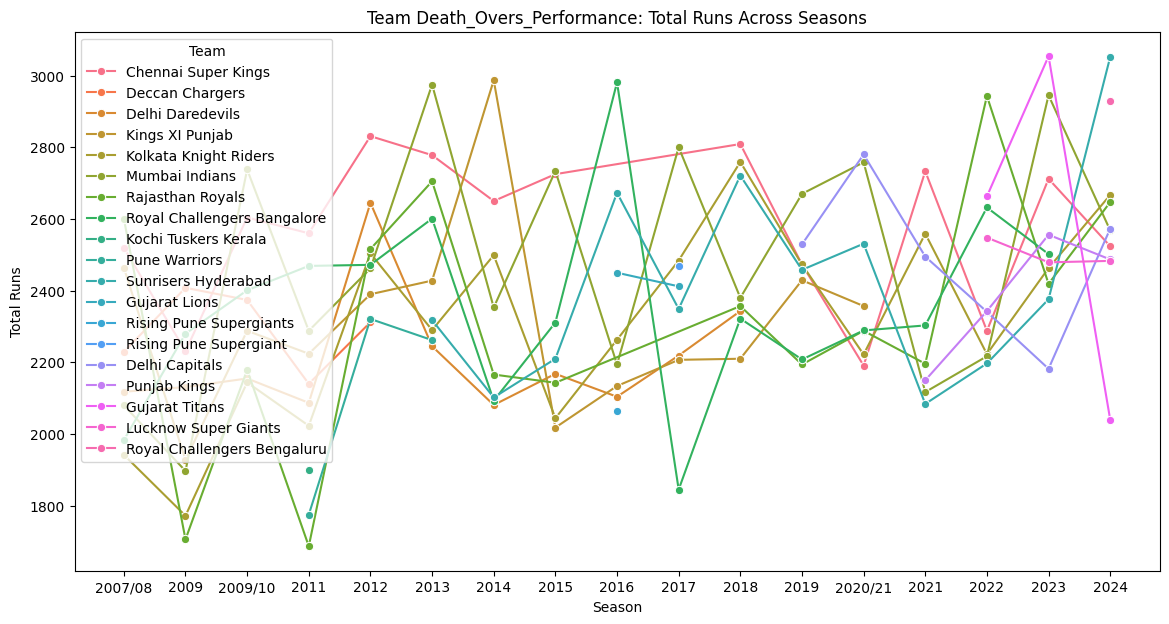

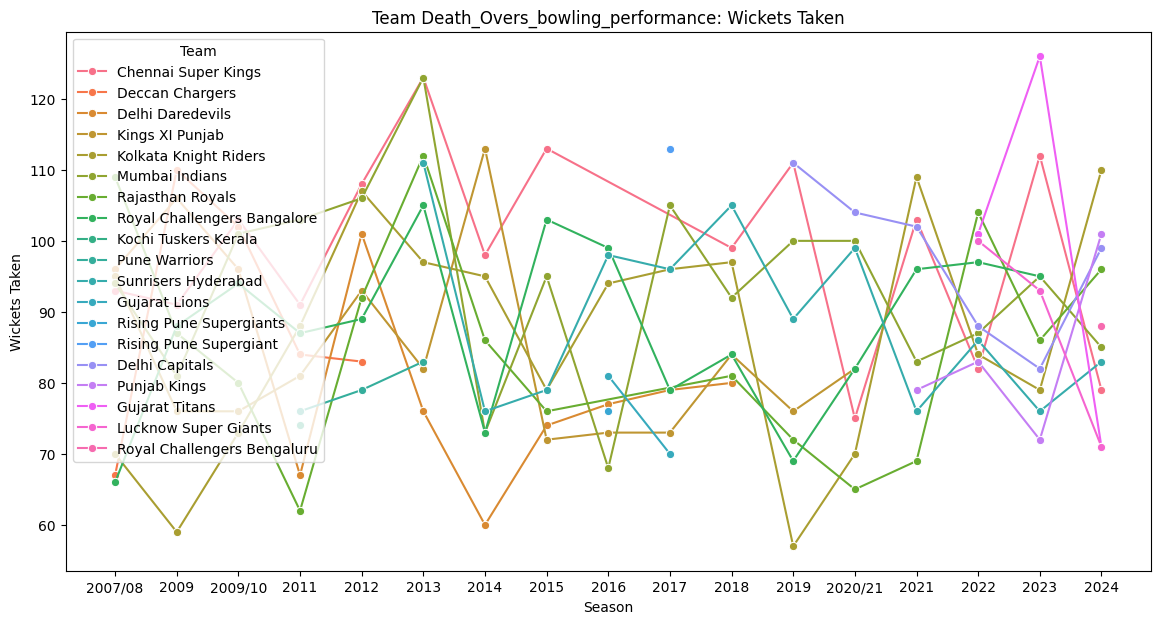

In [50]:
# plotting powerplay_performance (runs scored)
plt.figure(figsize=(14,7))
sns.lineplot(data=Death_Overs_Performance,x='season',y='total_runs',hue='batting_team',marker='o')
plt.title('Team Death_Overs_Performance: Total Runs Across Seasons')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.legend(title='Team')
plt.show()

# Plotting powerplay performance (wickets_lost)
plt.figure(figsize=(14,7))
sns.lineplot(data=Death_Overs_bowling_performance,x='season',y='wickets_taken',hue='bowling_team',marker='o')
plt.title('Team Death_Overs_bowling_performance: Wickets Taken')
plt.xlabel('Season')
plt.ylabel('Wickets Taken')
plt.legend(title='Team')
plt.show()

# **IPL Win Probability Prediction Using Machine Learning**

In [51]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [52]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [53]:
print(match.info())
print(delivery.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [54]:
# Step 1 Grouping Total runs by Match and Innings

delivery.groupby(['match_id','inning']).sum()['total_runs']

match_id  inning
335982    1         222
          2          82
335983    1         240
          2         207
335984    1         129
                   ... 
1426310   2         174
1426311   1         175
          2         139
1426312   1         113
          2         114
Name: total_runs, Length: 2217, dtype: int64

In [55]:
#step 2: Create a Dataframe for Total_runs
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
2212,1426310,2,174
2213,1426311,1,175
2214,1426311,2,139
2215,1426312,1,113


In [56]:
# Step 3: Filtering 1st Innings data

total_score_df = total_score_df[total_score_df['inning'] == 1]
total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [57]:
# Step 4: Let's Merge total runs with match data

match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [58]:
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110


In [59]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

**Current Active Teams (2025)**
- Chennai Super Kings
- Delhi Capitals,
- Gujarat Titans,
- Kolkata Knight Riders,
- Lucknow Super Giants,
- Mumbai Indians,
- Punjab Kings,
- Rajasthan Royals,
- Royal Challengers Bengaluru, and
- Sunrisers Hyderabad.

In [60]:
teams = ['Chennai Super Kings',
'Mumbai Indians',
'Royal Challengers Bengaluru',
'Kolkata Knight Riders',
'Delhi Capitals',
'Punjab Kings',
'Rajasthan Royals',
'Sunrisers Hyderabad',
'Lucknow Super Giants',
'Gujarat Titans'
]

In [61]:
# # Define mapping of old names to new names
# team_name_map = {
#     'Delhi Daredevils': 'Delhi Capitals',
#     'Kings XI Punjab': 'Punjab Kings',
#     'Deccan Chargers': 'Sunrisers Hyderabad',
#     'Rising Pune Supergiants': 'Rising Pune Supergiant'
# }

In [62]:
# ✅ Method 1: Using replace() with a dictionary
# match_df['team1'] = match_df['team1'].replace(team_name_map)
# match_df['team2'] = match_df['team2'].replace(team_name_map)

In [63]:
# ✅ Method 2: Apply mapping to multiple columns at once
# match_df[['team1', 'team2']] = match_df[['team1', 'team2']].replace(team_name_map)

In [64]:
# ✅ Method 3: Use applymap() if you want flexibility
# match_df[['team1', 'team2']] = match_df[['team1', 'team2']].applymap(lambda x: team_name_map.get(x, x))

In [65]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
match_df['team2'] = match_df['team2'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [66]:
match_df.shape

(1095, 22)

In [67]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [68]:
match_df = match_df[match_df['team1'].isin(teams) & match_df['team2'].isin(teams)]

In [69]:
match_df.shape

(756, 22)

In [70]:
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
5,335987,2007/08,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Punjab Kings,Kings XI Punjab,...,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin,335987,166
6,335988,2007/08,Hyderabad,2008-04-22,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Delhi Capitals,Deccan Chargers,...,wickets,9.0,143.0,20.0,N,NaN,IL Howell,AM Saheba,335988,142


In [71]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [72]:
match_df

,match_id,city,winner,total_runs
1,335983,Chandigarh,Chennai Super Kings,240
2,335984,Delhi,Delhi Daredevils,129
4,335986,Kolkata,Kolkata Knight Riders,110
5,335987,Jaipur,Rajasthan Royals,166
6,335988,Hyderabad,Delhi Daredevils,142
...,...,...,...,...
1090,1426307,Hyderabad,Sunrisers Hyderabad,214
1091,1426309,Ahmedabad,Kolkata Knight Riders,159
1092,1426310,Ahmedabad,Rajasthan Royals,172
1093,1426311,Chennai,Sunrisers Hyderabad,175


In [73]:
# Merging match_df and delivery_df


In [74]:
delivery_df = match_df.merge(delivery,on='match_id')

In [76]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335983,Chandigarh,Chennai Super Kings,240,1,Chennai Super Kings,Kings XI Punjab,0,1,PA Patel,B Lee,ML Hayden,0,0,0,NaN,0,NaN,NaN,NaN
1,335983,Chandigarh,Chennai Super Kings,240,1,Chennai Super Kings,Kings XI Punjab,0,2,PA Patel,B Lee,ML Hayden,0,0,0,NaN,0,NaN,NaN,NaN
2,335983,Chandigarh,Chennai Super Kings,240,1,Chennai Super Kings,Kings XI Punjab,0,3,PA Patel,B Lee,ML Hayden,1,0,1,NaN,0,NaN,NaN,NaN
3,335983,Chandigarh,Chennai Super Kings,240,1,Chennai Super Kings,Kings XI Punjab,0,4,ML Hayden,B Lee,PA Patel,0,0,0,NaN,0,NaN,NaN,NaN
4,335983,Chandigarh,Chennai Super Kings,240,1,Chennai Super Kings,Kings XI Punjab,0,5,ML Hayden,B Lee,PA Patel,4,0,4,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181208,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
181209,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
181210,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
181211,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [77]:
delivery_df = delivery_df[delivery_df['inning'] == 2]


In [79]:
delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,1,K Goel,JDP Oram,JR Hopes,4,0,4,NaN,0,NaN,NaN,NaN
125,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,2,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN
126,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,3,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN


In [80]:
# Calculate Current Score
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

/tmp/ipython-input-3799786095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


In [82]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,1,K Goel,...,JR Hopes,4,0,4,NaN,0,NaN,NaN,NaN,4
125,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,2,K Goel,...,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN,4
126,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,3,K Goel,...,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN,4
127,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,4,K Goel,...,JR Hopes,1,0,1,NaN,0,NaN,NaN,NaN,5
128,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,5,JR Hopes,...,K Goel,0,0,0,NaN,0,NaN,NaN,NaN,5


In [83]:
# Calculate the runs_left_y
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

/tmp/ipython-input-1233812351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']


In [85]:
delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,1,K Goel,...,4,0,4,NaN,0,NaN,NaN,NaN,4,236
125,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,2,K Goel,...,0,0,0,NaN,0,NaN,NaN,NaN,4,236
126,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,3,K Goel,...,0,0,0,NaN,0,NaN,NaN,NaN,4,236


In [86]:
# calculate the bowls_left
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

/tmp/ipython-input-2865536104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])


In [87]:
delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,1,K Goel,...,0,4,NaN,0,NaN,NaN,NaN,4,236,125
125,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,2,K Goel,...,0,0,NaN,0,NaN,NaN,NaN,4,236,124
126,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,3,K Goel,...,0,0,NaN,0,NaN,NaN,NaN,4,236,123


In [88]:
# Calculate the total_wickets

In [89]:
delivery_df['player_dismissed']

,player_dismissed
124,NaN
125,NaN
126,NaN
127,NaN
128,NaN
...,...
181208,NaN
181209,NaN
181210,NaN
181211,NaN


In [90]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

/tmp/ipython-input-117333967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
/tmp/ipython-input-117333967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
/tmp/ipython-input-117333967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [92]:
delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,1,K Goel,...,0,4,NaN,0,0,NaN,NaN,4,236,125
125,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,2,K Goel,...,0,0,NaN,0,0,NaN,NaN,4,236,124
126,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,3,K Goel,...,0,0,NaN,0,0,NaN,NaN,4,236,123


In [93]:
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

In [94]:
list(wickets)

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.in

In [111]:
delivery_df['wickets'] = 10 - wickets

/tmp/ipython-input-548317486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['wickets'] = 10 - wickets


In [112]:
delivery_df.tail(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr,result,wickets
181208,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,NaN,NaN,110,3,67,8,12.452830,0.268657,1,8
181209,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,NaN,NaN,111,2,66,8,12.333333,0.181818,1,8
181210,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,NaN,NaN,112,1,65,8,12.218182,0.092308,1,8
181211,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,NaN,NaN,113,0,64,8,12.107143,0.000000,1,8
181212,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,...,NaN,NaN,114,-1,63,8,12.000000,-0.095238,1,8


## Calculate CRR & SRR
- CC=runs/over
- SR=wickets/over

In [101]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

/tmp/ipython-input-2048085250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])


In [102]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

/tmp/ipython-input-2241449921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']


In [104]:
delivery_df.tail(4)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr
181209,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,0,NaN,NaN,111,2,66,8,12.333333,0.181818
181210,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,0,NaN,NaN,112,1,65,8,12.218182,0.092308
181211,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,0,NaN,NaN,113,0,64,8,12.107143,0.000000
181212,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,...,0,0,NaN,NaN,114,-1,63,8,12.000000,-0.095238


In [105]:
# Results columns

In [106]:
def result(row):
  return 1 if row['batting_team'] == row['winner'] else 0

In [107]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

/tmp/ipython-input-955537649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['result'] = delivery_df.apply(result,axis=1)


In [109]:
delivery_df.tail(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
181210,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,NaN,NaN,112,1,65,8,12.218182,0.092308,1
181211,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,NaN,NaN,113,0,64,8,12.107143,0.000000,1
181212,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,...,0,NaN,NaN,114,-1,63,8,12.000000,-0.095238,1


In [113]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [114]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
124,Kings XI Punjab,Chennai Super Kings,Chandigarh,236,125,10,240,-4.800000,11.328000,0
125,Kings XI Punjab,Chennai Super Kings,Chandigarh,236,124,10,240,-6.000000,11.419355,0
126,Kings XI Punjab,Chennai Super Kings,Chandigarh,236,123,10,240,-8.000000,11.512195,0
127,Kings XI Punjab,Chennai Super Kings,Chandigarh,235,122,10,240,-15.000000,11.557377,0
128,Kings XI Punjab,Chennai Super Kings,Chandigarh,235,121,10,240,-30.000000,11.652893,0
...,...,...,...,...,...,...,...,...,...,...
181208,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,3,67,8,113,12.452830,0.268657,1
181209,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,2,66,8,113,12.333333,0.181818,1
181210,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,1,65,8,113,12.218182,0.092308,1
181211,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,0,64,8,113,12.107143,0.000000,1


In [115]:
final_df.tail()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
181208,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,3,67,8,113,12.452830,0.268657,1
181209,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,2,66,8,113,12.333333,0.181818,1
181210,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,1,65,8,113,12.218182,0.092308,1
181211,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,0,64,8,113,12.107143,0.000000,1
181212,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,-1,63,8,113,12.000000,-0.095238,1


In [116]:
final_df.isna().sum()

,0
batting_team,0
bowling_team,0
city,4372
runs_left,0
balls_left,0
wickets,0
total_runs_x,0
crr,24
rrr,0
result,0


In [117]:
final_df.dropna(inplace=True)

/tmp/ipython-input-2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [136]:
final_df = final_df[final_df['balls_left'] != 0]

In [137]:
final_df.isna().sum()

,0
batting_team,0
bowling_team,0
city,0
runs_left,0
balls_left,0
wickets,0
total_runs_x,0
crr,0
rrr,0
result,0


In [138]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83035 entries, 124 to 181212
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   batting_team  83035 non-null  object 
 1   bowling_team  83035 non-null  object 
 2   city          83035 non-null  object 
 3   runs_left     83035 non-null  int64  
 4   balls_left    83035 non-null  int64  
 5   wickets       83035 non-null  int64  
 6   total_runs_x  83035 non-null  int64  
 7   crr           83035 non-null  float64
 8   rrr           83035 non-null  float64
 9   result        83035 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 7.0+ MB


In [139]:
X = final_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [140]:
X.shape,y.shape

((83035, 9), (83035,))

In [141]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [143]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [144]:
pipe.fit(X_train,y_train)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [145]:
X_train.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,66428.000000,66428.000000,66428.000000,66428.000000,6.642800e+04,66428.000000
mean,93.486165,68.678539,7.498991,168.861308,inf,8.488483
std,50.790688,33.374119,2.150875,30.861219,NaN,4.159466
min,-6.000000,3.000000,0.000000,67.000000,-1.320000e+02,-9.000000
25%,54.000000,41.000000,6.000000,148.000000,7.376147e+00,6.461538
50%,92.000000,69.000000,8.000000,168.000000,8.800000e+00,8.108108
75%,131.000000,97.000000,9.000000,188.000000,1.054054e+01,9.878788
max,286.000000,125.000000,10.000000,287.000000,inf,97.000000


In [146]:
delivery_df['crr'].isnull().sum()

np.int64(24)

In [147]:
X_train['crr'] = X_train['crr'].replace([np.inf, -np.inf], 0) # replace inf with 0

In [148]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [149]:
X_test['crr'] = X_test['crr'].replace([np.inf, -np.inf], 0) # replace inf with 0

In [150]:
y_pred = pipe.predict(X_test)

In [151]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8222436322032878

In [152]:
pipe.predict_proba(X_test)[10]

array([0.40325051, 0.59674949])

In [153]:
def match_summary(row):
  print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [164]:
import numpy as np

def match_progression(x_df, match_id, pipe):
    """
    Function to calculate match progression over time (end of each over).
    """

    # Filter match data (end of overs only)
    match = x_df[x_df['match_id'] == match_id]
    match = match[match['ball'] == 6]

    temp_df = match[['batting_team','bowling_team','city','runs_left',
                     'balls_left','wickets','total_runs_x','crr','rrr']]

    # Drop rows with invalid values
    temp_df = temp_df[temp_df['balls_left'] != 0]
    temp_df = temp_df.replace([np.inf, -np.inf], np.nan).dropna()

    if temp_df.empty:
        print("No valid data after cleaning. Possibly all rows had inf/NaN values.")
        return None, None

    # Model predictions (win/lose probabilities)
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)

    # Over number
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    # Target runs
    target = temp_df['total_runs_x'].values[0]

    # Runs scored per over
    runs_left = list(temp_df['runs_left'].values)
    new_runs = runs_left[:]
    runs_left.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs_left[:-1]) - np.array(new_runs)

    # Wickets lost per over
    wickets = list(temp_df['wickets'].values)
    before_wickets = [10] + wickets[:-1]
    temp_df['wickets_in_over'] = np.array(before_wickets) - np.array(wickets)

    print("Target -", target)

    return temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']], target


In [165]:
temp_df,target = match_progression(delivery_df,335983 ,pipe)

Target - 240


In [166]:
temp_df

,end_of_over,runs_after_over,wickets_in_over,lose,win
135,1,16,0,95.9,4.1
141,2,11,0,94.9,5.1
147,3,10,0,94.1,5.9
153,4,10,0,93.1,6.9
159,5,9,1,95.7,4.3
167,6,13,0,94.1,5.9
173,7,15,0,90.8,9.2
179,8,12,0,88.1,11.9
186,9,14,0,82.9,17.1
192,10,5,1,91.8,8.2


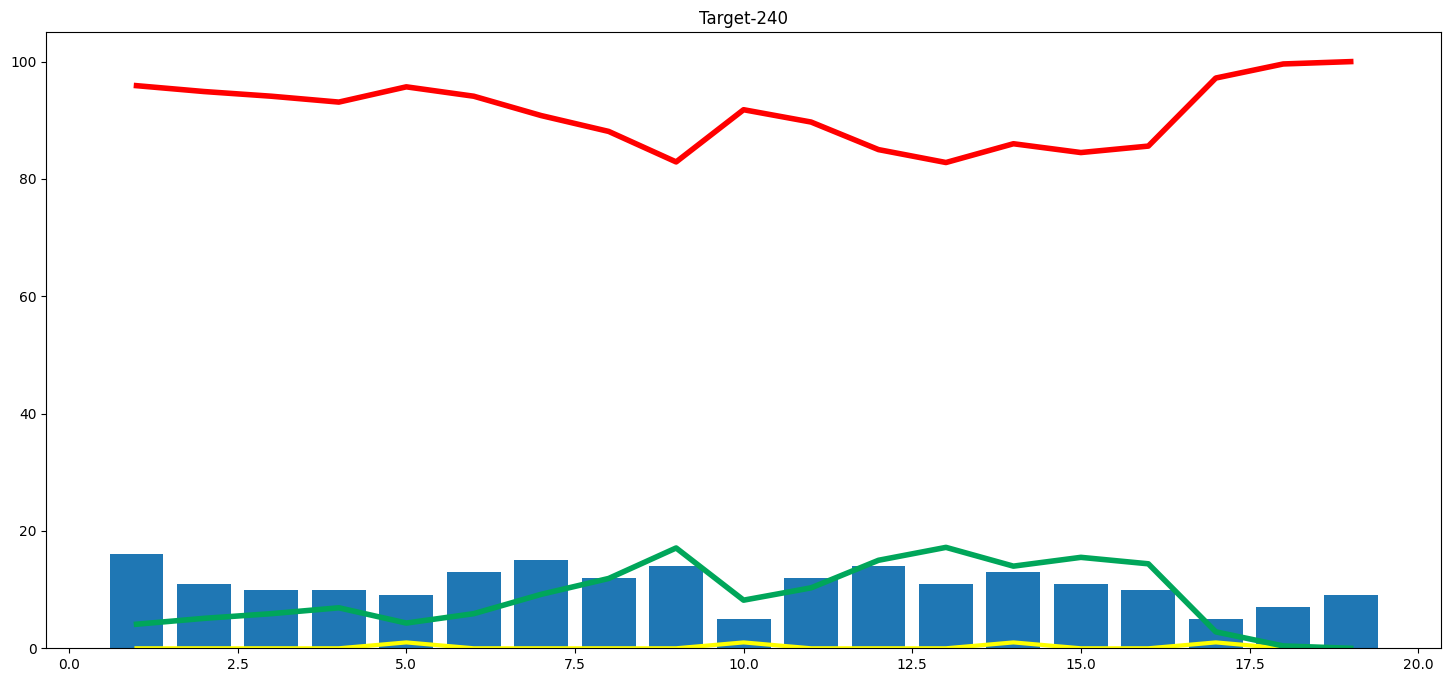

In [167]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], color='yellow', linewidth=3)
plt.plot(temp_df['end_of_over'], temp_df['win'], color='#00a65a', linewidth=4)
plt.plot(temp_df['end_of_over'], temp_df['lose'], color='red', linewidth=4)
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'])
plt.title('Target-' + str(target))
plt.show()
